# **Questão 2**

## **Instruções**



*   Verifique as respostas antes de enviar, veja se elas fazem sentido!
*   Lembre-se de salvar frequentemente!
*   Não envie apenas o notebook, envie a pasta inteira com as imagens!



# **Formulário**

## **Importações**
```
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
```

## **Códigos**
```
# Manipulação de imagens
img = Image.open('nome.extensão')
img = np.array(Image.open('nome.extensão'))
img = img[:, :, :3]
img_pil = Image.fromarray(img_np)
img.save('nome.png')
Image.fromarray(img).save('nome_arquivo.extensao')

# Histograma
plt.bar(range(256), histogram_r, color='red')
plt.bar(range(256), histogram_g, color='green')
plt.bar(range(256), histogram_b, color='blue')

# Detecção de bordas
abs_tg_eixo = np.abs(np.diff(img, axis=eixo, append=0))
```

## **Fórmulas**

### **Grayscale**

Lightness: $\frac{max(R,G,B)+min(R,G,B)}{2}$

Average: $\frac{R+G+B}{3}$

Luminosity: $0.2126 \cdot R + 0.7152 \cdot G + 0.0722 \cdot B$


### **Cor**

$$\begin{bmatrix}
    R \\ G \\ B
\end{bmatrix} = \begin{bmatrix}
    255 \\ 255 \\ 255
\end{bmatrix} - \begin{bmatrix}
    C \\ M \\ Y
\end{bmatrix}$$



**a)** Abra os arquivos **dog.jpg** e **oculos.jpg** presentes na pasta e mostre na tela. Verifique a presença do canal alfa e faça o devido tratamento caso ele exista.

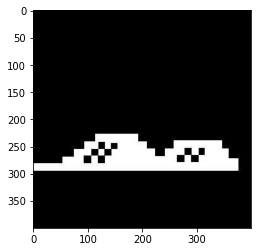

In [82]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Abrindo e mostrando imagem do dog.jpg
img_dog = np.array(Image.open('dog.jpg'))[:, :, :3]
plt.imshow(img_dog)

#Abrindo e mostrando imagem do oculos.jpg
img_oc = np.array(Image.open('oculos.jpg'))[:, :, :3]
plt.imshow(img_oc)

**b)** Realize a mudança de escala na imagem **dog.jpg** a fim de deixá-la com as mesmas dimensões da imagem **oculos.jpg**. Exiba o resultado.

**Obs: utilize o Nearest Neighbor ou Interpolação Bilinear para resolver o problema de ausência de pixels.**

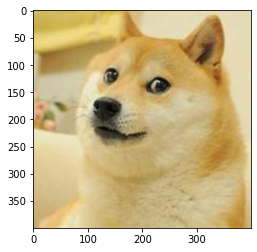

In [83]:
def bilinear_scale(img, ls, cs):
    le, ce, p = img.shape
    sl = le / ls
    sc = ce / cs
    result = np.zeros((ls, cs, p), dtype=img.dtype)
    for l in range(ls):
        lf = l * sl
        l0 = np.clip(int(np.floor(lf)), 0, le - 1)
        l1 = np.clip(l0 + 1, 0, le - 1)
        dl = lf - l0
        odl = 1 - dl
        for c in range(cs):
            cf = c * sc
            c0 = np.clip(int(np.floor(cf)), 0, ce - 1)
            c1 = np.clip(c0 + 1, 0, ce - 1)
            dc = cf - c0
            odc = 1 - dc
            result[l, c] = img[l0, c0] * odl * odc \
                         + img[l1, c0] * dl  * odc \
                         + img[l0, c1] * odl * dc  \
                         + img[l1, c1] * dl  * dc
    
    return result

(l_dog, c_dog, p_dog) = img_dog.shape
#newImg_dog = imagem com nova escala
newImg_dog = bilinear_scale(img_dog, l_dog * 2, c_dog * 2)
plt.imshow(newImg_dog)
Image.fromarray(newImg_dog).save('newImg_dog.jpg')

**c)** Faça espelhamento da imagem **oculos.jpg** nos eixos **x e y**. Exiba o resultado.

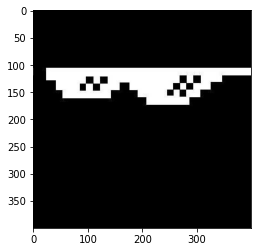

In [84]:
(l_oc, c_oc, p_oc) = img_oc.shape

reverse_oc = np.zeros(shape=img_oc.shape, dtype=np.uint8)

for i in range(l_oc):
    for j in range(c_oc):
        new_y = -i
        new_x = -j
        
        reverse_oc[new_y, new_x] = img_oc[i, j]

#reverse_oc = nova imagem do óculos espelhado em x e em y
plt.imshow(reverse_oc)
Image.fromarray(reverse_oc).save('reverse_oc.jpg')

**d)** Realize a operação lógica NOT na imagem daquestão anterior. Exiba o resultado.

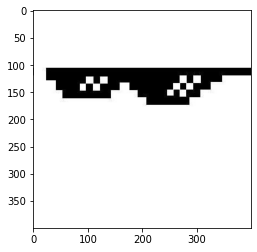

In [85]:
reverse_oc_not = np.bitwise_not(reverse_oc) #reverse_oc_not = imagem do óculos espelhado e com a operação not
plt.imshow(reverse_oc_not, cmap='gray')
Image.fromarray(reverse_oc_not).save('reverse_oc_not.jpg')

**e)** Realize a operação lógica E entre as imagens das questões **B** e **D**. Exiba o resultado.

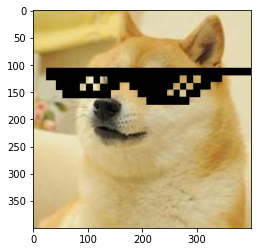

In [86]:
dog_and_oc = np.bitwise_and(newImg_dog, reverse_oc_not) #Realizando operação de and entre as imgs: newImg_dog e reverse_oc_not
plt.imshow(dog_and_oc)
Image.fromarray(dog_and_oc).save('dog_and_oc.jpg')

**f)** Realize o cisalhamento na imagem da questão anterior. Utilize cx = 0,3 e cy = 0,2.

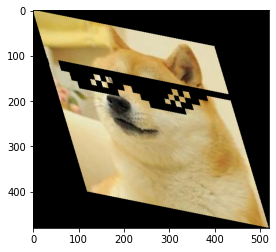

In [87]:
cx, cy = 0.3, 0.2
(l_and ,c_and ,p_and) = dog_and_oc.shape

dog_oc_shear = np.zeros((int(l_and * (1 + cy)), int(c_and * (1 + cx)), p_and), dtype=np.uint8)
for i in range(l_and):
    for j in range(c_and):
        newAnd_x = int(j + cx * i)
        newAnd_y = int(cy * j + i)
        
        dog_oc_shear[newAnd_y, newAnd_x] = dog_and_oc[i, j]#dog_oc_shear = nova imagem com cisalhamento

plt.imshow(dog_oc_shear)
Image.fromarray(dog_oc_shear).save('dog_oc_shear.jpg')

**g)** Converta a imagem da questão anterior para preto e branco. Exiba o resultado.

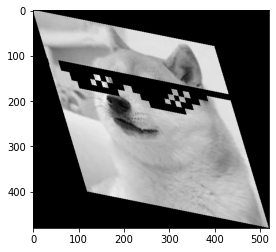

In [88]:
gray_dog_oc = (0.2126 * dog_oc_shear[:, :, 0] + 0.7152 * dog_oc_shear[:, :, 1] + 0.0722 * dog_oc_shear[:, :, 2]).astype(np.uint8)

plt.imshow(gray_dog_oc, cmap = "gray")
Image.fromarray(gray_dog_oc).save('gray_dog_oc.jpg')

**h)** Realize a detecção de bordas da imagem anterior. Utilize o método da convolução e o kernel de Sobel. Exiba o resultado.

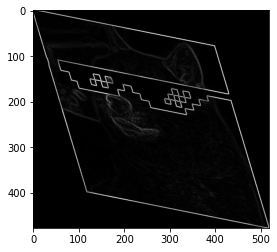

In [89]:
def conv(img, kernel):
    m, n = kernel.shape
    l, c = img.shape
    new_l = l - m + 1
    new_c = c - n + 1
    out = np.zeros(shape=(new_l, new_c))
    for i in range(new_l):
        for j in range(new_c):
            out[i, j] = np.sum(img[i:i+m, j:j+n] * kernel)
                
    return out

def edge(img, kernel_x, kernel_y):
    conv_x = conv(img, kernel_x)
    conv_y = conv(img, kernel_y)
    
    gradient = np.hypot(conv_x, conv_y)
    
    return gradient

def sobel(img):
    kernel_x = np.array([[1, 0, -1], [2, 0, -2], [ 1,  0, -1]], dtype=np.float64)
    kernel_y = np.array([[1, 2,  1], [0, 0,  0], [-1, -2, -1]], dtype=np.float64)
    return edge(img / 255, kernel_x, kernel_y)


dog_oc_sobel = sobel(gray_dog_oc)
plt.imshow(dog_oc_sobel, cmap='gray')
Image.fromarray(gray_dog_oc).save('dog_oc_sobel.jpg')